In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1.csv')
df.shape

(5640, 2)

In [3]:
df.head()

,Time,domain
0,2/1/2022 22:52,mail.google.com
1,2/1/2022 22:57,www.google.com
2,2/1/2022 22:57,my.umbc.edu
3,2/1/2022 22:58,my.umbc.edu
4,2/1/2022 22:58,webauth.umbc.edu


In [4]:
df.tail()

,Time,domain
5635,4/17/2022 13:58,webauth.umbc.edu
5636,4/17/2022 13:58,webauth.umbc.edu
5637,4/17/2022 13:58,webauth.umbc.edu
5638,4/17/2022 13:58,my.umbc.edu
5639,4/17/2022 13:59,drive.google.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-02-01 22:52:00,mail.google.com
1,2022-02-01 22:57:00,www.google.com
2,2022-02-01 22:57:00,my.umbc.edu
3,2022-02-01 22:58:00,my.umbc.edu
4,2022-02-01 22:58:00,webauth.umbc.edu


In [15]:
df['domain'].value_counts()[:50]

www.google.com               1420
webauth.umbc.edu             1000
github.com                    636
my.umbc.edu                   522
blackboard.umbc.edu           357
umbc-csm.symplicity.com       297
www.amazon.com                280
commerce.cashnet.com          108
www.youtube.com                94
www.linkedin.com               91
my3.my.umbc.edu                76
vimeo.com                      70
mail.google.com                58
csprd-web.ps.umbc.edu          56
www.netflix.com                51
accounts.google.com            50
www.quora.com                  32
careers.umbc.edu               30
umb.taleo.net                  28
drive.google.com               26
www.coursehero.com             20
www.geeksforgeeks.org          16
s3.amazonaws.com               15
umbc.webex.com                 13
docs.google.com                10
auth.amazon.com                10
www.resume-now.com             10
myretrievercare.umbc.edu       10
stackoverflow.com               8
colab.research

<AxesSubplot:>

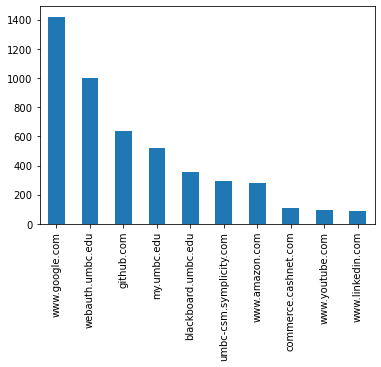

In [16]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [17]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     562
1     169
2      99
3       2
5      15
6       2
7      12
8      34
10     36
11     98
12    196
13    198
14     74
15    171
16    310
17    310
18    483
19    240
20    476
21    551
22    791
23    811
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

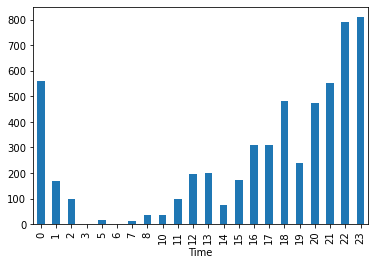

In [18]:
hourly_counts.plot.bar()

In [19]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-02-01 22:52:00,mail.google.com,Tuesday,1
1,2022-02-01 22:57:00,www.google.com,Tuesday,1
2,2022-02-01 22:57:00,my.umbc.edu,Tuesday,1
3,2022-02-01 22:58:00,my.umbc.edu,Tuesday,1
4,2022-02-01 22:58:00,webauth.umbc.edu,Tuesday,1


In [20]:
df['Day'].value_counts()

Sunday       1466
Thursday      817
Monday        715
Wednesday     713
Friday        697
Saturday      658
Tuesday       574
Name: Day, dtype: int64

In [21]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     715
1     574
2     713
3     817
4     697
5     658
6    1466
Name: DayIndex, dtype: int64

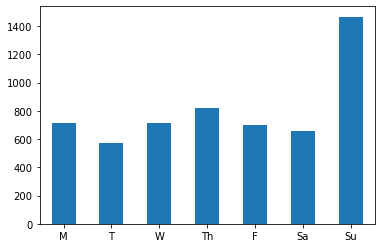

In [22]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [23]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-01 22:52:00,mail.google.com,Tuesday,1,False
1,2022-02-01 22:57:00,www.google.com,Tuesday,1,False
2,2022-02-01 22:57:00,my.umbc.edu,Tuesday,1,False
3,2022-02-01 22:58:00,my.umbc.edu,Tuesday,1,False
4,2022-02-01 22:58:00,webauth.umbc.edu,Tuesday,1,False


In [24]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [25]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
794,2022-02-05 22:13:00,www.google.com,Saturday,5,True
795,2022-02-05 22:13:00,www.google.com,Saturday,5,True
796,2022-02-05 22:13:00,www.google.com,Saturday,5,True
797,2022-02-05 22:13:00,github.com,Saturday,5,True
798,2022-02-05 22:13:00,github.com,Saturday,5,True


In [26]:
weekday['domain'].value_counts()[:5]

webauth.umbc.edu           711
www.google.com             676
github.com                 385
my.umbc.edu                378
umbc-csm.symplicity.com    261
Name: domain, dtype: int64

In [27]:
weekend['domain'].value_counts()[:5]

www.google.com      744
webauth.umbc.edu    289
github.com          251
www.amazon.com      174
my.umbc.edu         144
Name: domain, dtype: int64

In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

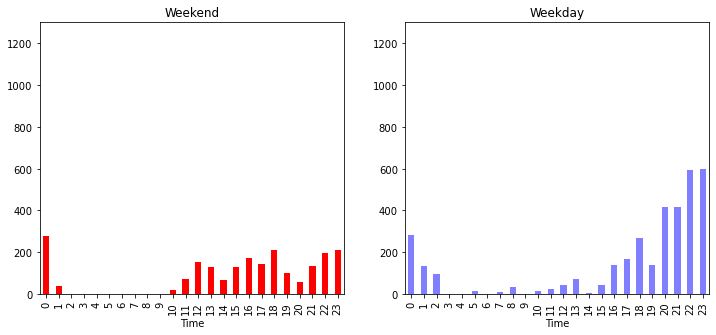

In [28]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


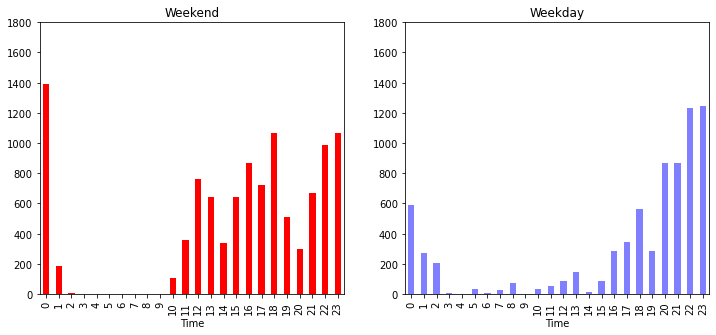

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com             1420
webauth.umbc.edu           1000
github.com                  636
my.umbc.edu                 522
blackboard.umbc.edu         357
umbc-csm.symplicity.com     297
www.amazon.com              280
commerce.cashnet.com        108
www.youtube.com              94
www.linkedin.com             91
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

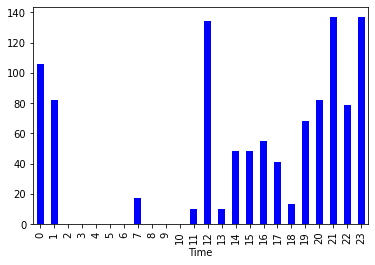

In [34]:
_= show_domain_stats('amazon', 'blue')

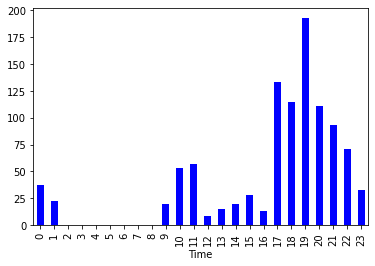

In [41]:
_= show_domain_stats('umbc', 'blue')

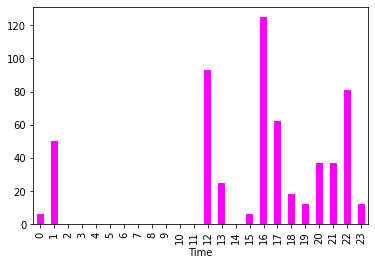

In [35]:
_ = show_domain_stats('linkedin', 'magenta')


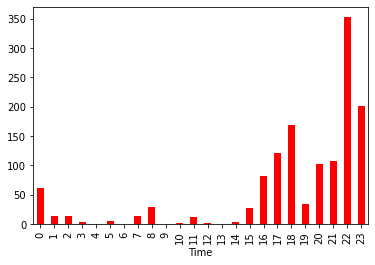

In [36]:
_ = show_domain_stats('github', 'red')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. Looks like the individual is a student and not working currently by looking at the hours he/she spends on blackboard and umbc websites. So this has to be a personal computer
2. There is no such site which indicates that the individual is employed. But looking at the blackboard and umbc websites, it seems that the individual is a student at UMBC.Also by looking at the amount of time spent on linkedin, it looks like the individual is in search of a job.
3. The individual majorly spends time on youtube and amazon. So seems like he/she likes entertainment videos and movies and shows and likes shopping. He/She also sleeps around 2 and wakes up around 10. So he/she keeps up at night.
4. The most interesting thing about this individual is that he/she is generally active in the evening. Even university related work is being done in the evening so looks like he/she does all her work in the evening. One more interesting fact is that, he/she spends maximum time on blackboard, umbc site and courses/webauth which seeam related to umbc which indicates that he/she is very very dedicated towards his/her studies.